## Cataract Detection

This colab notebook is to detect cataract from eye image dataset using Deep Learning Algorithms. I aim to use CNN and VGG19 to do so.
And then compare them to see which works better!

### Step - 01: Including all the necessory librabries in Python to perform the operations.

In [1]:
!pip install gdown

In [6]:
!gdown --id "1Msqv0zdpojrkJYhp931Hsl3eECvCrXTp" -O archive.zip

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1Msqv0zdpojrkJYhp931Hsl3eECvCrXTp
From (redirected): https://drive.google.com/uc?id=1Msqv0zdpojrkJYhp931Hsl3eECvCrXTp&confirm=t&uuid=e6d5ef96-1e8c-461c-b224-3bd86d9410a4
To: /content/archive.zip
100% 529M/529M [00:07<00:00, 67.4MB/s]


In [7]:
!unzip archive.zip

Archive:  archive.zip
  inflating: processed_images/test/normal/image_248.png  
  inflating: processed_images/test/normal/image_252.png  
  inflating: processed_images/test/normal/image_280.png  
  inflating: processed_images/test/normal/image_275.png  
  inflating: processed_images/test/normal/image_260.png  
  inflating: processed_images/test/normal/image_292.png  
  inflating: processed_images/test/normal/image_282.png  
  inflating: processed_images/test/normal/image_255.png  
  inflating: processed_images/test/normal/image_287.png  
  inflating: processed_images/test/normal/image_299.png  
  inflating: processed_images/test/normal/image_263.png  
  inflating: processed_images/test/normal/image_271.png  
  inflating: processed_images/test/normal/image_274.png  
  inflating: processed_images/test/normal/image_301.png  
  inflating: processed_images/test/normal/image_303.png  
  inflating: processed_images/test/normal/image_281.png  
  inflating: processed_images/test/normal/image_26

In [19]:
# from google.colab import drive
# #Please Download the dataset to use, the link is given below
# #https://drive.google.com/drive/folders/1F_Kq-OgENM3H7Ti9ID40piPPzQBvfdOW?usp=sharing
# drive.mount('/content/drive/')

In [27]:
!pip install -q keras

In [28]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, InceptionV3, MobileNetV2, VGG19

### Step - 02: Including Datasets

I used two different datasets; Test and Train for their respective uses.

To run the code, please include the datasets from here:\
https://drive.google.com/drive/folders/1F_Kq-OgENM3H7Ti9ID40piPPzQBvfdOW?usp=sharing

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_generator = train_datagen.flow_from_directory(
    './processed_images/train/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    './processed_images/test/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

Found 491 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


In [11]:
input_shape = (224, 224, 3)

model = Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

### Step - 03: Using CNN

I used CNN to check how efficiently the algorithm is. Here is a brief summary:

1. The algorithm takes approximately 20 minutes to perform the operation.
2. The test accuracy is 94.21% and Loss is 0.4525

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 82s 5s/step - accuracy: 0.5352 - loss: 0.8563 - val_accuracy: 0.5124 - val_loss: 0.6417
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 77s 5s/step - accuracy: 0.6471 - loss: 0.6111 - val_accuracy: 0.8182 - val_loss: 0.3856
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 77s 5s/step - accuracy: 0.8343 - loss: 0.4788 - val_accuracy: 0.7851 - val_loss: 0.4723
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 78s 5s/step - accuracy: 0.8009 - loss: 0.4093 - val_accuracy: 0.8512 - val_loss: 0.4044
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 74s 4s/step - accuracy: 0.8802 - loss: 0.3283 - val_accuracy: 0.7603 - val_loss: 0.5091
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 89s 5s/step - accuracy: 0.8700 - loss: 0.3302 - val_accuracy: 0.9008 - val_loss: 0.3648
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 75s 5s/step - accuracy: 0.9284 - loss: 0.2153 - val_accuracy: 0.8595 - val_loss: 0.3463
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 77s 5s/step - accuracy: 0.9346 - loss: 0.1766 - val_accuracy: 0.9008 - val_loss:

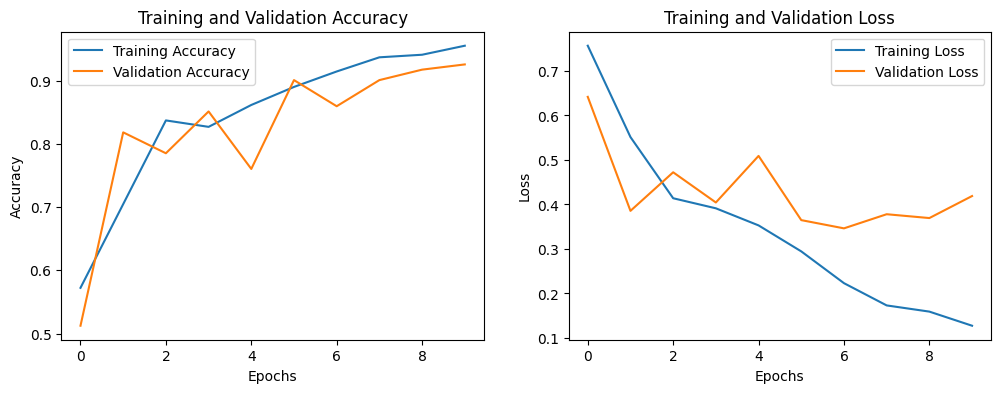

4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9327 - loss: 0.5125
Test Accuracy: 92.56%


In [12]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)


test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

### Step - 04: Using VGG19

Using VGG19 has it's own benefits over VGG16. \
Here is the summary:
1. The algorithm took approximately 1 hour 30 minutes to complete the opeartion.
2. The Test accuracy is 95.04% and the loss is 0.1202.

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,235,905 (88.64 MB)

 Trainable params: 3,211,521 (12.25 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 485s 30s/step - accuracy: 0.5789 - loss: 0.7553 - val_accuracy: 0.9091 - val_loss: 0.2702
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 480s 30s/step - accuracy: 0.8475 - loss: 0.3732 - val_accuracy: 0.9421 - val_loss: 0.1853
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 525s 33s/step - accuracy: 0.9195 - loss: 0.2456 - val_accuracy: 0.9421 - val_loss: 0.1564
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 479s 30s/step - accuracy: 0.9308 - loss: 0.1899 - val_accuracy: 0.9504 - val_loss: 0.1435
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 483s 30s/step - accuracy: 0.9372 - loss: 0.1624 - val_accuracy: 0.9421 - val_loss: 0.1387
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 478s 30s/step - accuracy: 0.9568 - loss: 0.1380 - val_accuracy: 0.9504 - val_loss: 0.1216
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 548s 33s/step - accuracy: 0.9608 - loss: 0.1170 - val_accuracy: 0.9587 - val_loss: 0.1201
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 475s 30s/step - accuracy: 0.9725 - loss: 0.0962 - val_accuracy: 0.

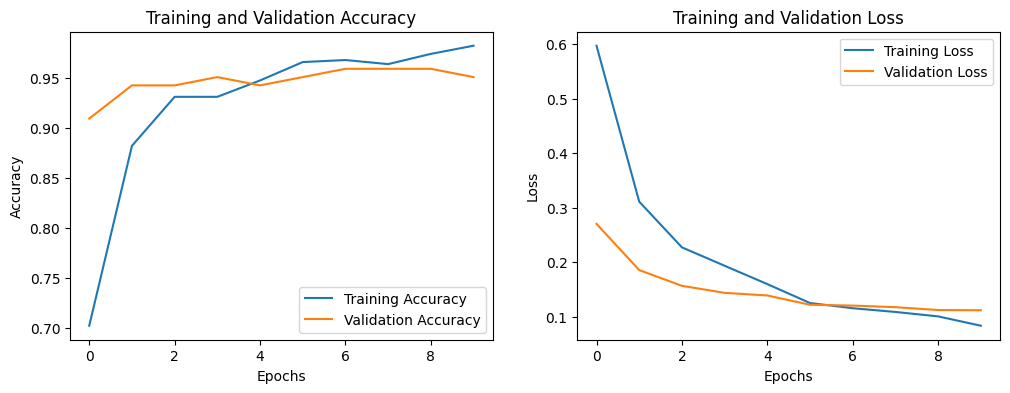

4/4 ━━━━━━━━━━━━━━━━━━━━ 94s 23s/step - accuracy: 0.9572 - loss: 0.1060
Test Accuracy: 95.04%


In [34]:
from tensorflow.keras.optimizers import Adam
input_shape = (224, 224, 3)


base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in base_model.layers:
    layer.trainable = False


model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


model.summary()


history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Conclusion

1. CNN and VGG19 have similar test accuracy.
2. CNN proves unefficient in terms of loss.
3. VGG19 is not time efficient for multiple reasons.